In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\MAMATA\\Downloads'

In [3]:
data=pd.read_csv(r"Diwali Sales Data.csv", encoding=  "unicode_escape")
#to avoid encoding error

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
data.drop(["Status","unnamed1"],axis=1,inplace=True)

In [7]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
data["Amount"]=data["Amount"].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


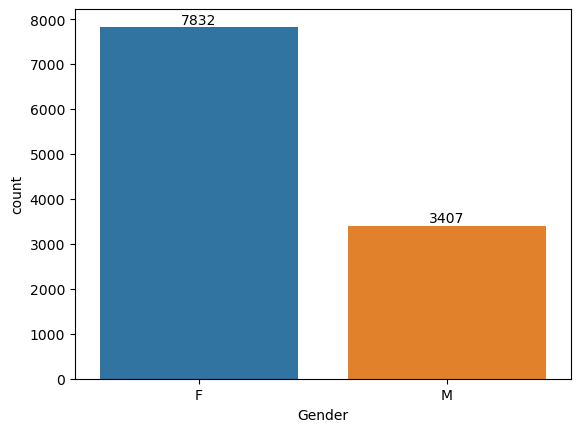

In [14]:
 ax=sns.countplot(x="Gender",data=data)
    
for bars in ax.containers:
        ax.bar_label(bars)

In [15]:
data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

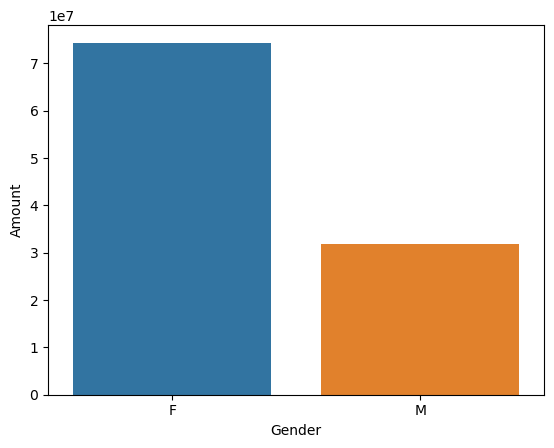

In [16]:
sns.barplot(x="Gender",y="Amount",data=data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False))

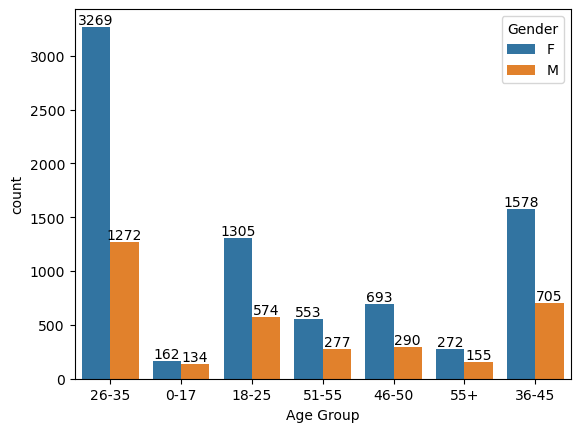

In [17]:
ax=sns.countplot(data=data,x="Age Group",hue="Gender")

for bars in ax.containers:
        ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

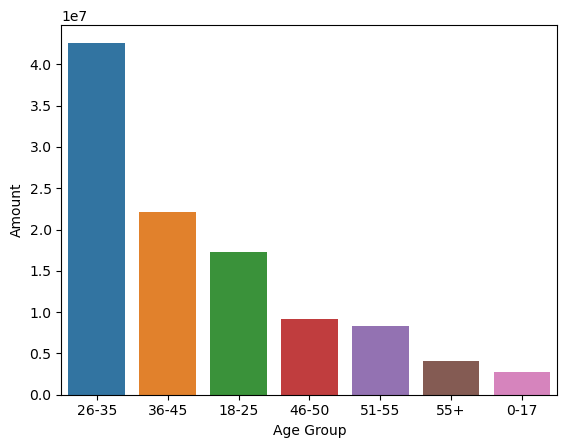

In [18]:
sns.barplot(x="Age Group",y="Amount",data=data.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False))

In [19]:
#from above graph we can see that most buyers are of age group between 26-35

<Axes: xlabel='State', ylabel='Orders'>

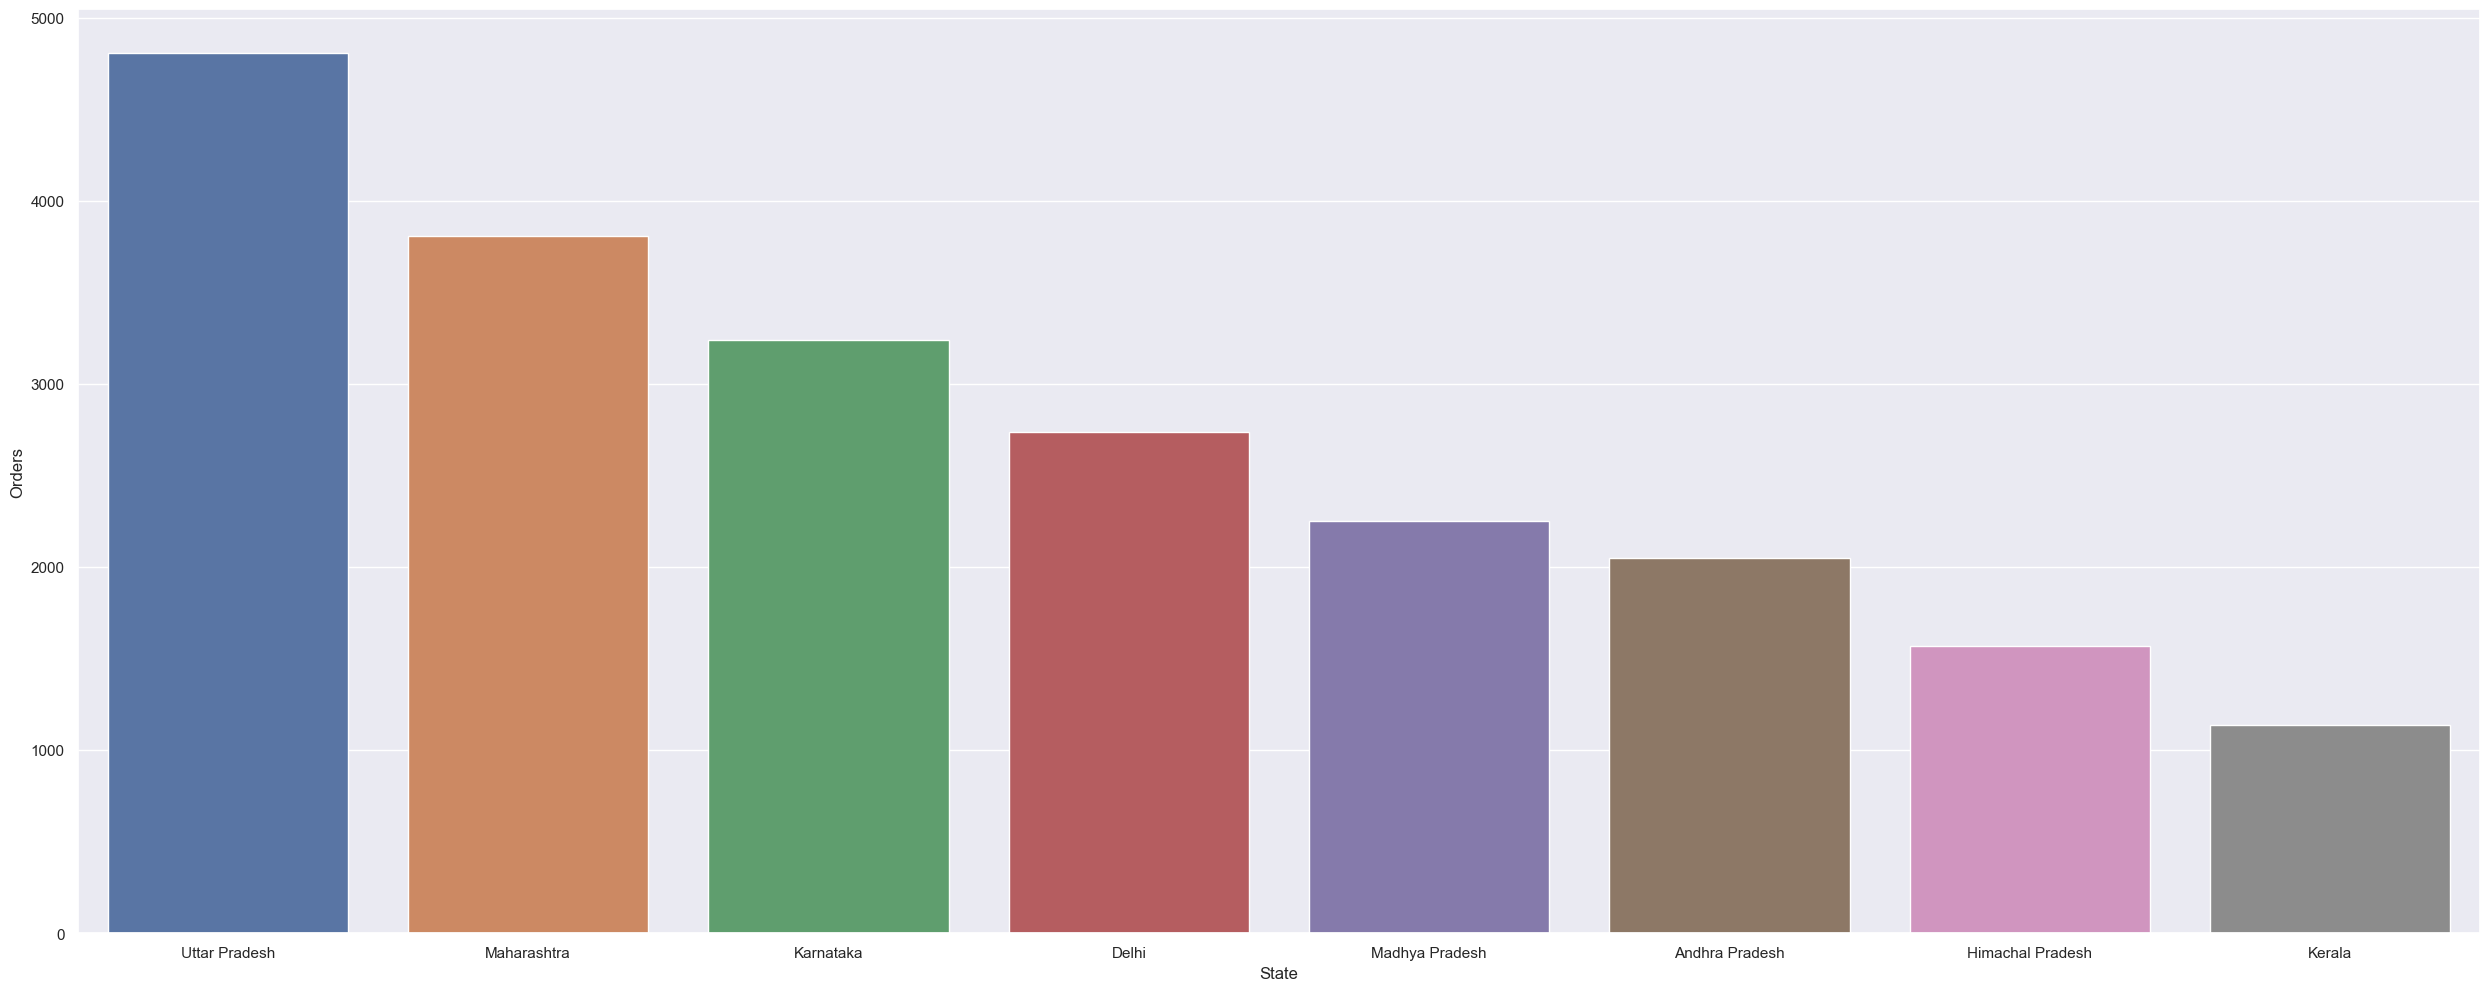

In [20]:
sales_state=data.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(8)
sns.set(rc={"figure.figsize":(31,12)})
sns.barplot(data=sales_state,x="State",y="Orders")

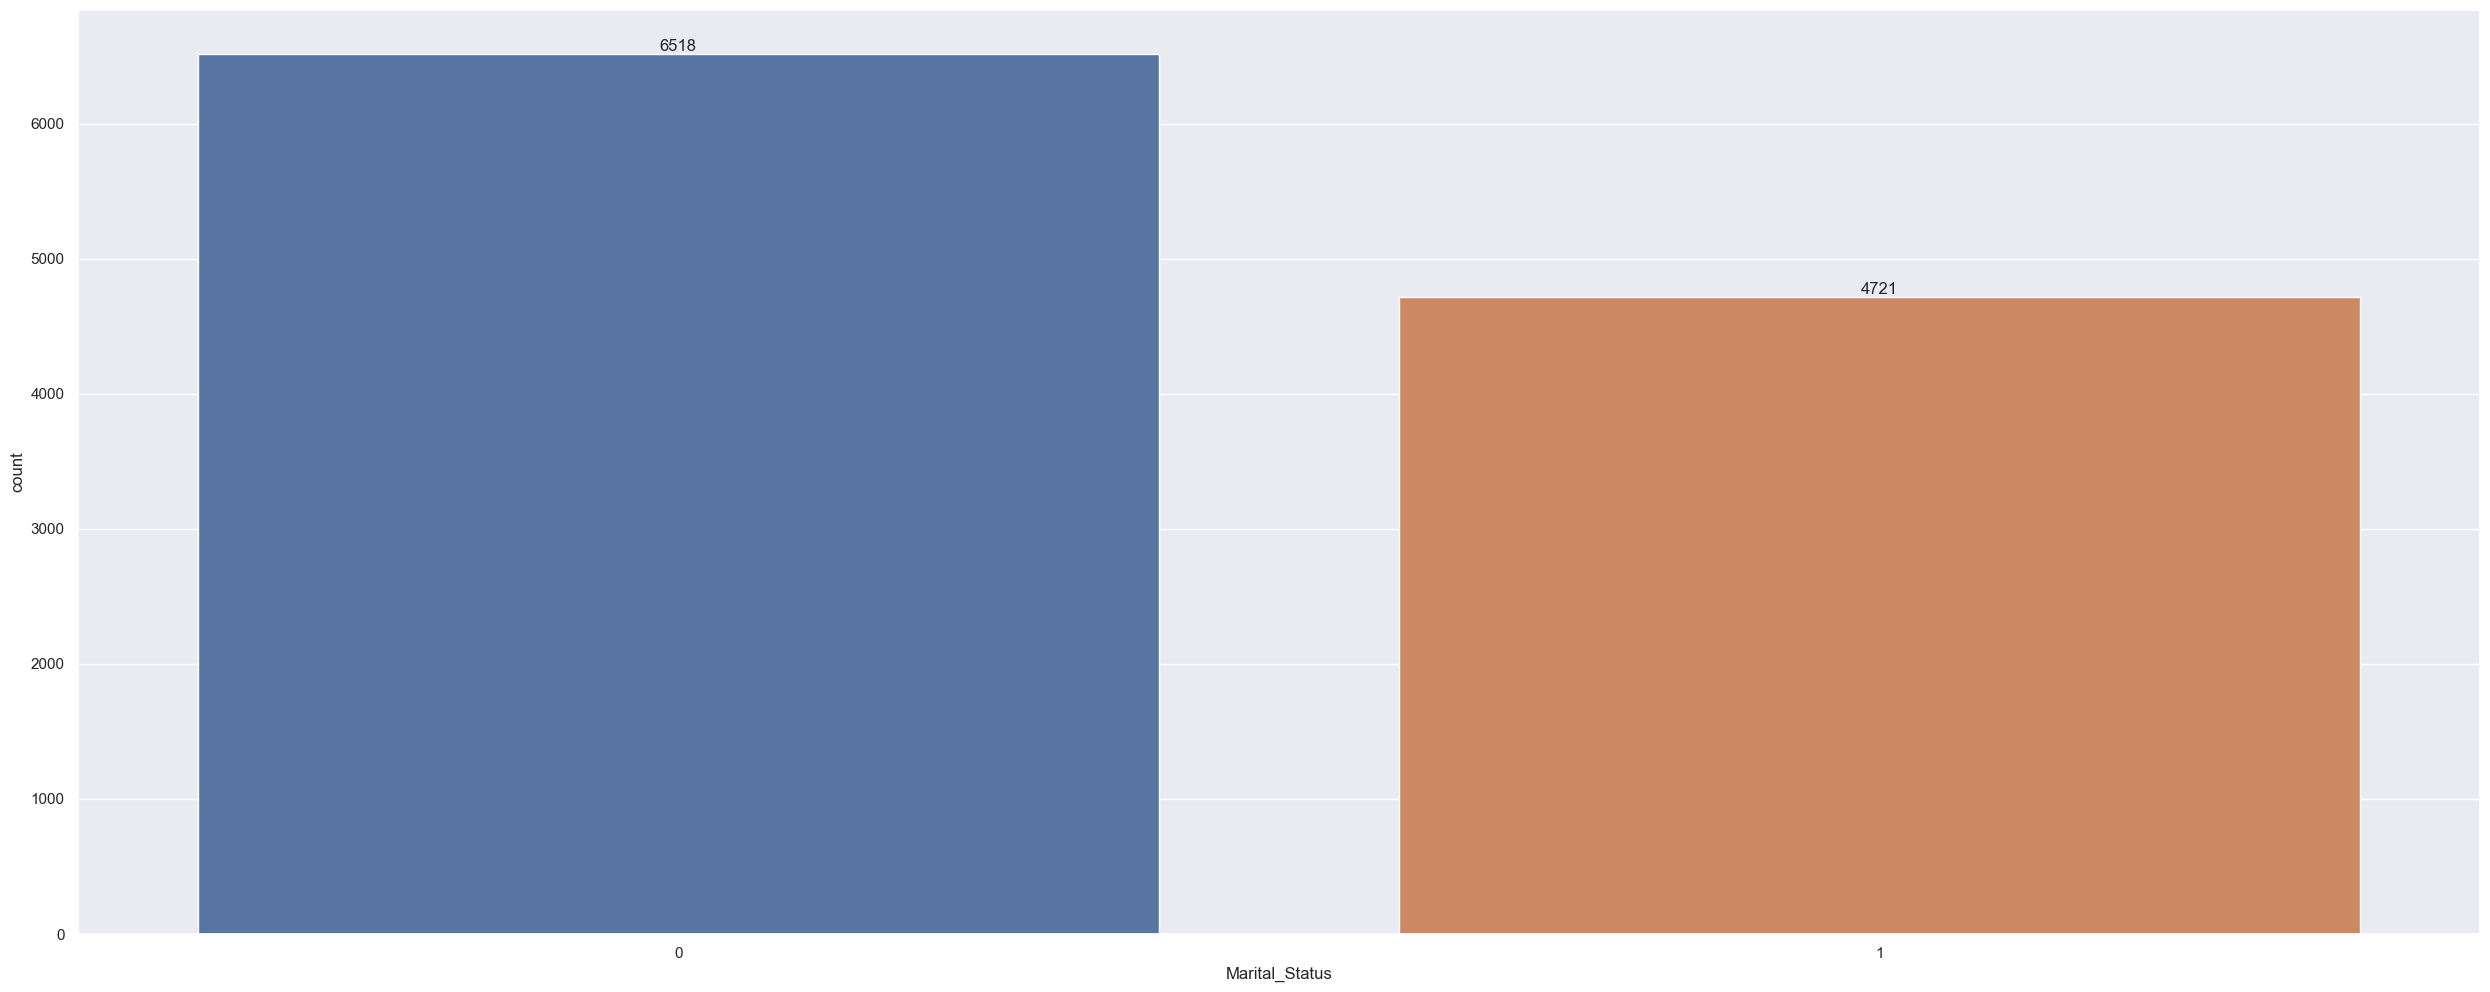

In [21]:
 ax=sns.countplot(data=data,x="Marital_Status")
sns.set(rc={"figure.figsize":(10,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

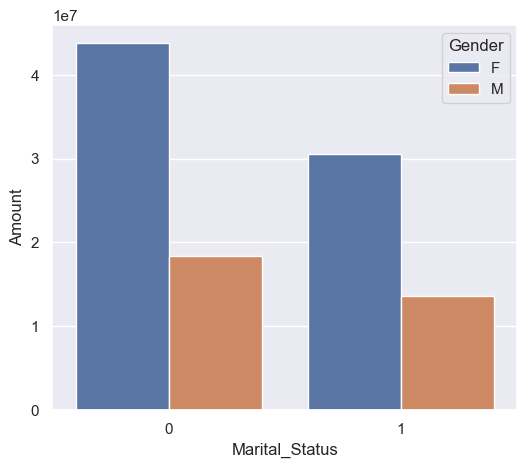

In [22]:
sales_state=data.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(8)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(data=sales_state,x="Marital_Status",y="Amount",hue="Gender")

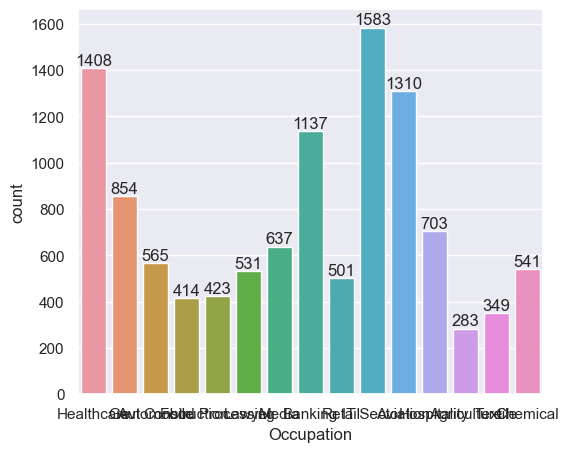

In [23]:
  ax=sns.countplot(data=data,x="Occupation")
sns.set(rc={"figure.figsize":(20,110)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

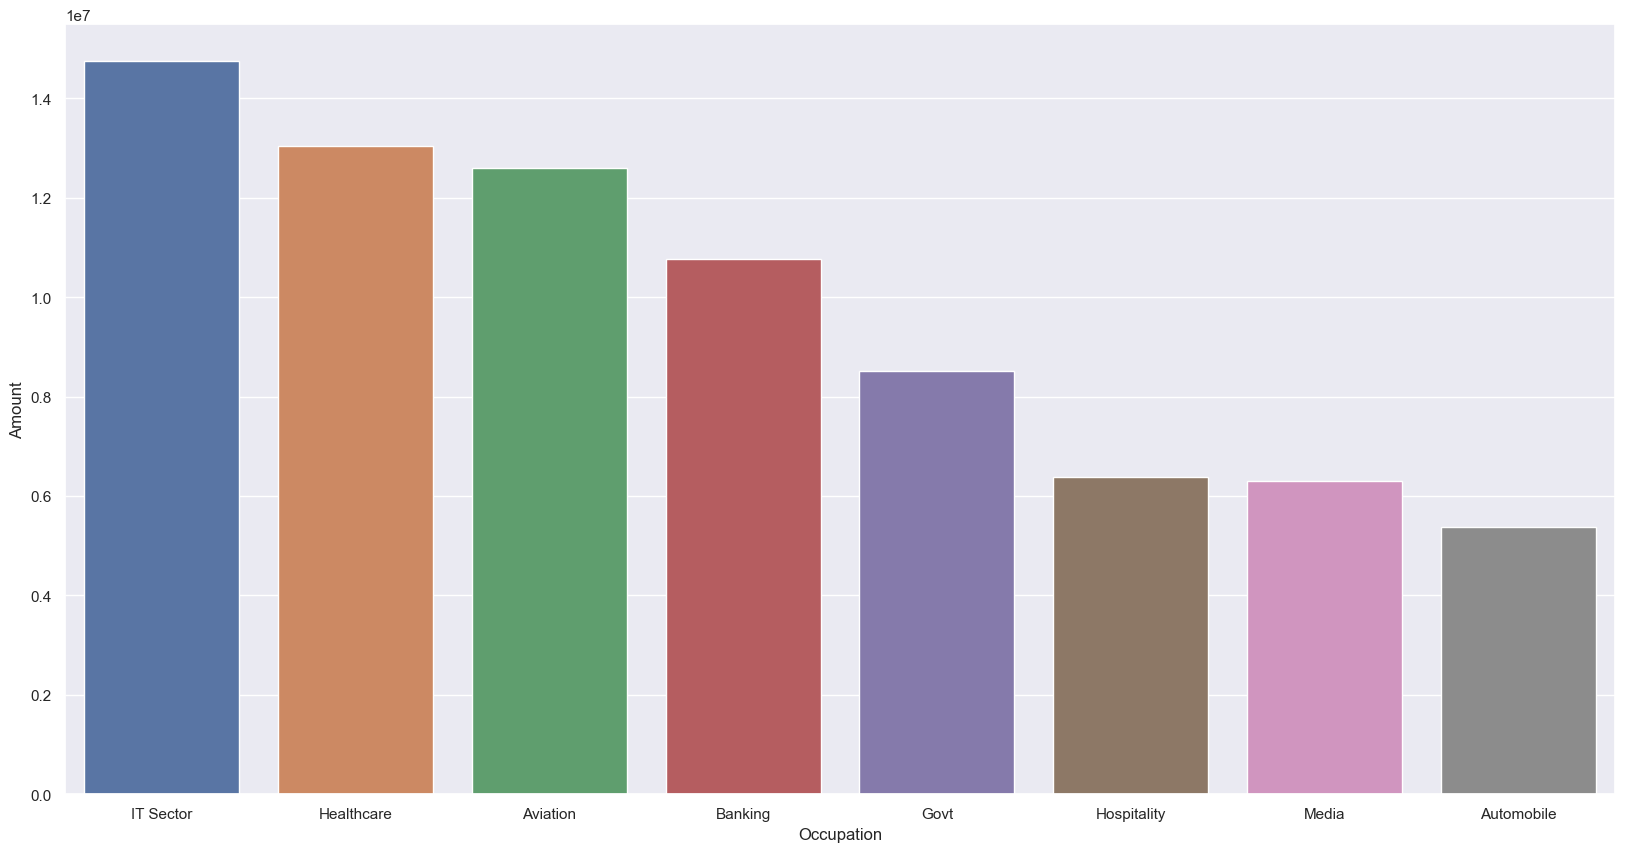

In [24]:
sales_state=data.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(8)
sns.set(rc={"figure.figsize":(20,10)})
sns.barplot(data=sales_state,x="Occupation",y="Amount")

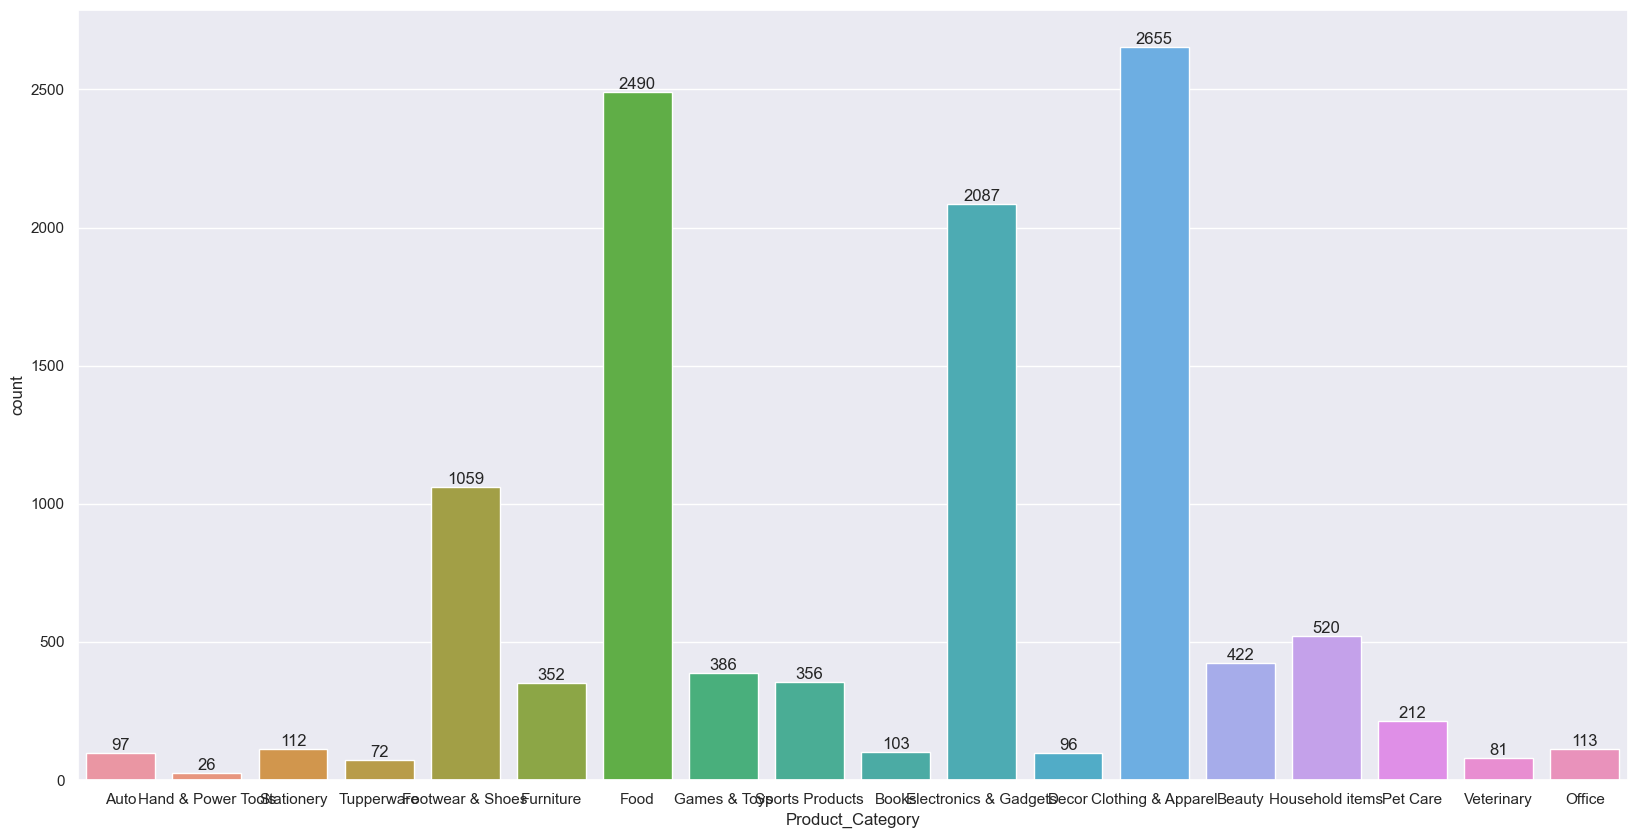

In [25]:
ax=sns.countplot(data=data,x="Product_Category")
sns.set(rc={"figure.figsize":(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

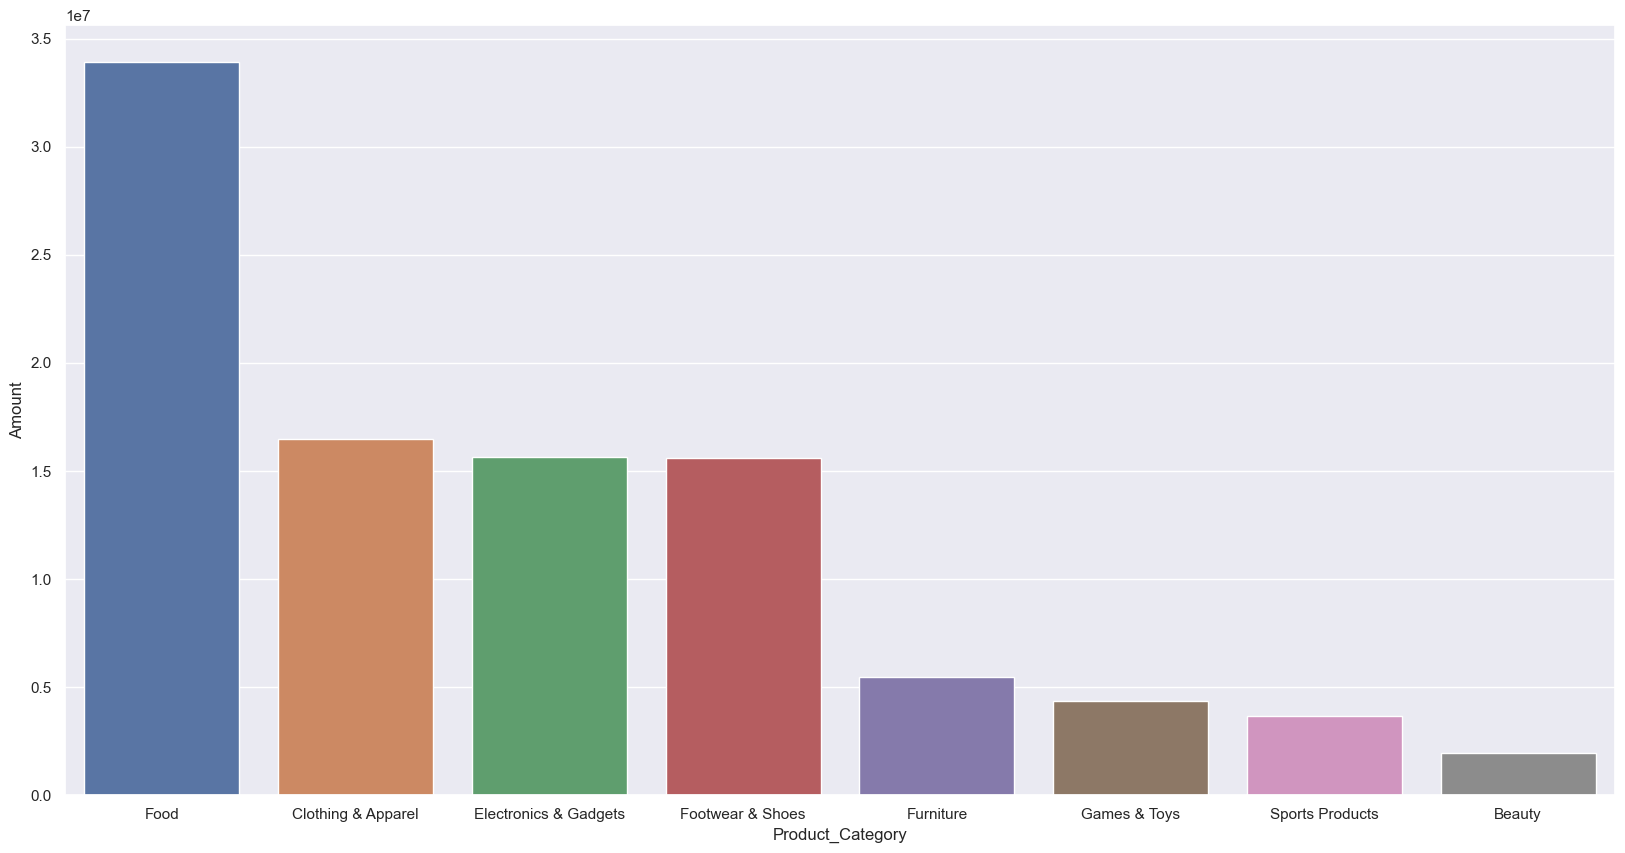

In [26]:
sales_state=data.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(8)
sns.set(rc={"figure.figsize":(20,10)})
sns.barplot(data=sales_state,x="Product_Category",y="Amount")